### Sample notebook for CL-Windcon LES summary data read and basic exploration

<img src="https://files.dtu.dk/fss/public/link/public/stream/read/3WT_layout.png?linkToken=ts3L0a3Ny5akzcvT&itemName=3WT_layout.png">

Here we provide an example on how to read the CL-Windcon LES summary data for separate test cases. In this notebook, we are using the .pckl file included in the SUMMARY folder in the output of the runs under normal operation. The filse is a subset of the provided dataset for calibration of WFC-oriented models. Full description of the dataset can be found in *CL-Windcon_SOWFA_data_Guidelines.pdf* file that is included in the forwarded data package to the benchmark participants. To read more about the FarmConners WFC benchmark and register, see [here](https://farmconners.readthedocs.io/).

This example could be used for calibration of the models for the blind test in:
* Single full wake under WFC (subset of 3WT configuration)
* Multiple wake under WFC with 3WTs

In [1]:
# Load the main libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Example of reading the provided .pckl file for VEL_MEAN variables - CALIBRATION dataset

basePath = 'example_dataset/'
# an example basePath would be '/mnt/my_ftp/FarmConnersBenchmarkSOWFA/3_WT/OUTPUTS/SUMMARY/'

'''
# Within SUMMARY folder, we have 3 'channels' with several variables
# 1) RESULTS_OutputTurbine -> Power, torque, thrust, rotational speed, pitch, and blade(s) axial moment
# 2) SLICE_MEAN -> time averaged wind speed component values on each of the planes
# 3) VEL_MEAN -> (time and spatially averaged) wind speed, direction, turbulence intensity and std of wind speed
'''
channel = 'VEL_MEAN' +'/'
WFC_scenario = 'Y000' # several yaw cases are available, including combinations for T0 and T1
full_path = basePath + channel + 'CALIBRATION/' + WFC_scenario + '/U_hubHeight_TurbMean.pckl'

pData = pd.read_pickle(full_path)
NT       = pData['NT']   # Velocity 
POS      = pData['POS']  # Position of the points among the slice
# Both NT and POS has keys each turbine and each distance (in flow direction) respect the turbine center in diameters. 
tLimited = pData['tLimited']  # Array with the time values


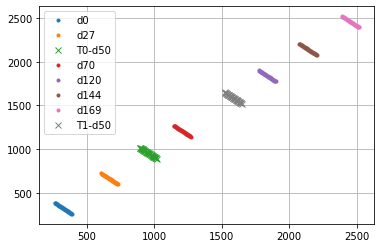

In [22]:
# Basic plot of the positions relative to the most upstream turbine, T0 

''' see Distance_keys_for_pickle.dat for conversion of the dxx keys to relative axial distance '''

plt.plot(POS['T0']['d0'][:,0], POS['T0']['d0'][:,1],'.', label='d0')
plt.plot(POS['T0']['d27'][:,0], POS['T0']['d27'][:,1],'.', label='d27')
plt.plot(POS['T0']['d50'][:,0], POS['T0']['d50'][:,1],'x', label='T0-d50')  # location of the upstream turbine T0
plt.plot(POS['T0']['d70'][:,0], POS['T0']['d70'][:,1],'.', label='d70') 
plt.plot(POS['T0']['d120'][:,0], POS['T0']['d120'][:,1],'.', label='d120')
plt.plot(POS['T0']['d144'][:,0], POS['T0']['d144'][:,1],'.', label='d144')
plt.plot(POS['T0']['d169'][:,0], POS['T0']['d169'][:,1],'.', label='d169')

plt.plot(POS['T1']['d50'][:,0], POS['T1']['d50'][:,1],'x', label='T1-d50') # location of the second turbine T1
plt.legend()
plt.grid()
plt.show()


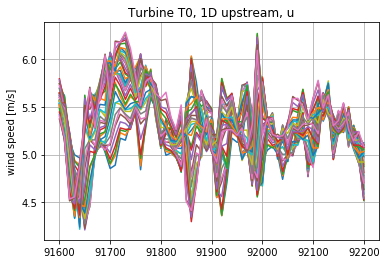

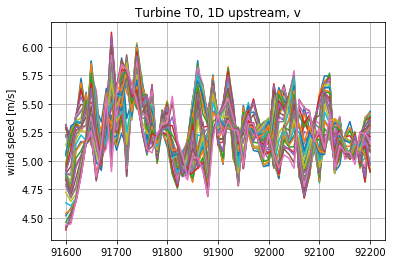

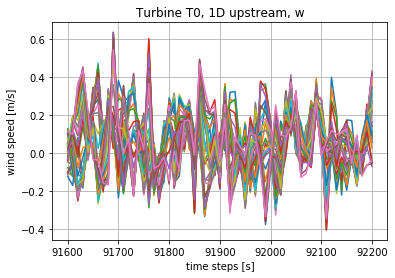

In [23]:
# Plot the velocity time series those slices (37 points) 1D upstream of thr turbines: turbine inflow u, v and w component  

plt.plot(tLimited, NT['T0']['d40'][0])
plt.title ('Turbine T0, 1D upstream, u')
plt.ylabel('wind speed [m/s]')
plt.grid()
plt.show()

plt.plot(tLimited, NT['T0']['d40'][1])
plt.title ('Turbine T0, 1D upstream, v')
plt.ylabel('wind speed [m/s]')
plt.grid()
plt.show()

plt.plot(tLimited, NT['T0']['d40'][2])
plt.title ('Turbine T0, 1D upstream, w')
plt.ylabel('wind speed [m/s]')
plt.xlabel('time steps [s]')
plt.grid()
plt.show()

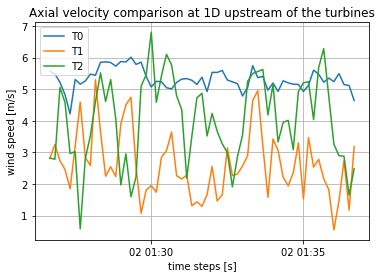

In [24]:
# Comparison of the inflow wind speed per turbine (using the axial flow velocity at 1D upstream of the turbines)
'''
# --- indices--- #
# ['d40'] for 1D upstream (-1D) 
# [0] for u component
# [19] for the mid point of the slice (37points) -> hub of the turbine
'''
WS_T0 = NT['T0']['d40'][0][19] 
WS_T1 = NT['T1']['d40'][0][19] 
WS_T2 = NT['T2']['d40'][0][19]
 
plt.plot(WS_T0, label='T0')
plt.plot(WS_T1, label='T1')
plt.plot(WS_T2, label='T2')

plt.xlabel('time steps [s]')
plt.ylabel('wind speed [m/s]')
plt.title('Axial velocity comparison at 1D upstream of the turbines')
plt.grid()
plt.legend()
plt.show()